In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy import io
import os
import tqdm

In [19]:
data_path_ROI = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\datos_5_sujetos\ESI_ROI_pseudo_trials'
data_path_STOK = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\datos_5_sujetos\ESI_STOK_pseudo_trials_diag\ESI_STOK_pseudo_trials_diag'
subject_list_ROI = [elem for elem in os.listdir(data_path_ROI) if elem.startswith('sub')]
subject_list_STOK = [elem for elem in os.listdir(data_path_STOK) if elem.startswith('sub')]

n_subjects = len(subject_list_ROI)
n_times = 326

accuracies_ROI = np.zeros([n_subjects, n_times])
accuracies_STOK = np.zeros([n_subjects, n_times])

for i in range(n_subjects):
    data_ROI = io.loadmat(os.path.join(data_path_ROI, subject_list_ROI[i]))
    data_STOK = io.loadmat(os.path.join(data_path_STOK, subject_list_STOK[i]))
    
    X_ROI = data_ROI['X']
    y_ROI = np.ravel(data_ROI['y'])
    X_STOK = data_STOK['X']
    y_STOK = np.ravel(data_STOK['y'])
    
    for t in range(n_times):
        X_train, X_test, y_train, y_test = train_test_split(X_ROI[:,:,t], y_ROI, test_size=0.4, random_state=0)
        #clf = SVC(kernel="linear", C=0.025)
        clf = SVC()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies_ROI[i,t] = np.mean(y_test == y_pred) * 100
        
        X_train, X_test, y_train, y_test = train_test_split(X_STOK[:,:,t], y_STOK, test_size=0.4, random_state=0)
        #clf = SVC(kernel="linear", C=0.025)
        clf = SVC()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies_STOK[i,t] = np.mean(y_test == y_pred) * 100

Text(0, 0.5, 'accuracy')

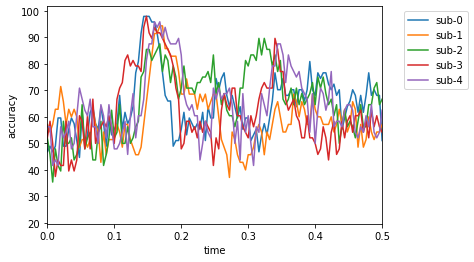

In [20]:
time = np.arange(-0.8,0.501,0.004)

for i in range(n_subjects):
    plt.plot(time, accuracies_ROI[i], label=f'sub-{i}')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.xlim(0, 0.5) 
plt.xlabel('time')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

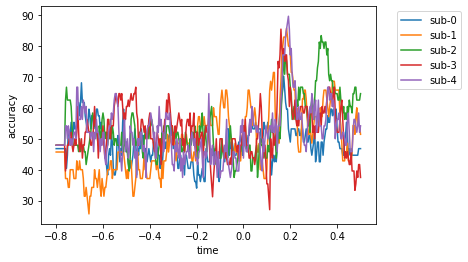

In [21]:
time = np.arange(-0.8,0.501,0.004)

for i in range(n_subjects):
    plt.plot(time, accuracies_STOK[i], label=f'sub-{i}')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
#plt.xlim(0, 0.5)    
plt.xlabel('time')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

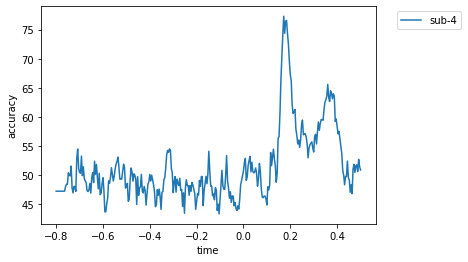

In [27]:
time = np.arange(-0.8,0.501,0.004)

plt.plotShaded(time, np.mean(accuracies_STOK, 0), label=f'sub-{i}')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
#plt.xlim(0, 0.5)    
plt.xlabel('time')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

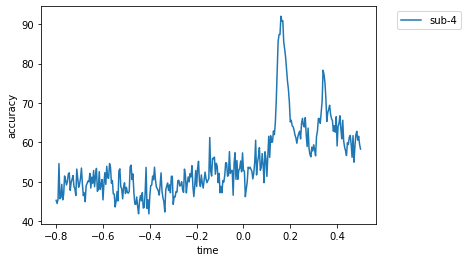

In [28]:
time = np.arange(-0.8,0.501,0.004)

plt.plot(time, np.mean(accuracies_ROI, 0), label=f'sub-{i}')

plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
#plt.xlim(0, 0.5)    
plt.xlabel('time')
plt.ylabel('accuracy')

In [2]:
def fancyFig(ax):
    ax.tick_params(width=3, length=8)
    ax.spines['top'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(0)


def plotShaded(x, y, axis, color, label, ax, ls='-'):
    ax.plot(x, np.median(y, axis=axis), color=color, lw=2, label=label, ls=ls)
    ax.fill_between(x, *np.percentile(y, (5, 95), axis=axis), color=color,
                    alpha=.4)
    return ax


def plotShadedNorm(x, y, axis, color, label, ax, ls='-'):
    ax.plot(x, np.mean(y, axis=axis), color=color, lw=2, label=label, ls=ls)
    ax.fill_between(x, *[[1], [-1]]*np.std(y, axis=axis) +
                    np.mean(y, axis=axis), color=color, alpha=.4)
    return ax

AttributeError: 'Figure' object has no attribute 'save'

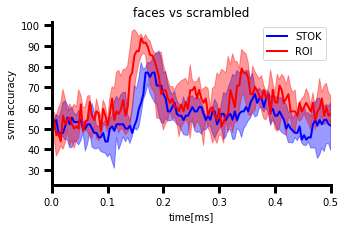

In [42]:
fig, axes = plt.subplots(1, 1, figsize=[5, 3])
plotShaded(time, accuracies_STOK, 0, 'b', 'STOK', axes)
plotShaded(time, accuracies_ROI, 0, 'r', 'ROI', axes)
axes.set_xlabel('time[ms]')
axes.set_ylabel('svm accuracy')
axes.set_title('faces vs scrambled')
axes.set_xlim(0, 0.5)
axes.legend()
fancyFig(axes)

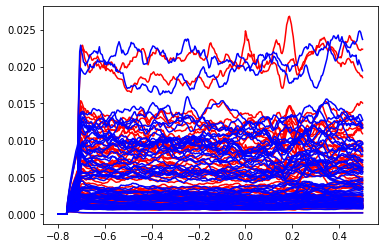

In [22]:
plt.plot(time, X_STOK[y_STOK == 1].mean(0).T, 'r');
plt.plot(time, X_STOK[y_STOK == 0].mean(0).T, 'b');

In [23]:
np.shape(X_ROI)

(118, 68, 326)

In [24]:
np.shape(X_STOK)

(118, 68, 326)

In [25]:
y_train

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1], dtype=uint8)

In [26]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1], dtype=uint8)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

data_path_ROI = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\datos_5_sujetos\ESI_ROI_pseudo_trials'
data_path_STOK = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\datos_5_sujetos\ESI_STOK_pseudo_trials_diag\ESI_STOK_pseudo_trials_diag'
data_path_STOK_off = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\datos_5_sujetos\ESI_STOK_pseudo_trials_offdiag'
data_path_STOK_all = r'C:\Users\andre\OneDrive\Escritorio\UbuntuShare\Proyecto2\datos_5_sujetos\ESI_STOK_pseudo_trials_all'

subject_list_ROI = [elem for elem in os.listdir(data_path_ROI) if elem.startswith('sub')]
subject_list_STOK = [elem for elem in os.listdir(data_path_STOK) if elem.startswith('sub')]
subject_list_STOK_off = [elem for elem in os.listdir(data_path_STOK_off) if elem.startswith('sub')]
subject_list_STOK_all = [elem for elem in os.listdir(data_path_STOK_all) if elem.startswith('sub')]


data_ROI = io.loadmat(os.path.join(data_path_ROI, subject_list_ROI[0]))
data_STOK = io.loadmat(os.path.join(data_path_STOK, subject_list_STOK[0]))
data_STOK_off = io.loadmat(os.path.join(data_path_STOK_off, subject_list_STOK_off[0]))
data_STOK_all = io.loadmat(os.path.join(data_path_STOK_all, subject_list_STOK_all[0]))

# Set the parameters by cross-validation
tuned_parameters = np.logspace(-2,2,10)
n_params = len(tuned_parameters)
n_subjects = len(subject_list_ROI)
n_times = 326

scores = ['accuracy']

accuracies_ROI = np.zeros([n_params, n_subjects, n_times])
accuracies_STOK = np.zeros([n_params, n_subjects, n_times])
accuracies_STOK_off = np.zeros([n_params, n_subjects, n_times])
accuracies_STOK_all = np.zeros([n_params, n_subjects, n_times])

for iterator, parameter in tqdm.tqdm(enumerate(tuned_parameters)):
    for i in range(n_subjects):
        data_ROI = io.loadmat(os.path.join(data_path_ROI, subject_list_ROI[i]))
        data_STOK = io.loadmat(os.path.join(data_path_STOK, subject_list_STOK[i]))
        data_STOK_off = io.loadmat(os.path.join(data_path_STOK_off, subject_list_STOK_off[i]))
        data_STOK_all = io.loadmat(os.path.join(data_path_STOK_all, subject_list_STOK_all[i]))
        

        X_ROI = data_ROI['X']
        y_ROI = np.ravel(data_ROI['y'])
        X_STOK = data_STOK['X']
        y_STOK = np.ravel(data_STOK['y'])
        X_STOK_off = data_STOK_off['X']
        y_STOK_off = np.ravel(data_STOK_off['y'])
        X_STOK_all = data_STOK_all['X']
        y_STOK_all = np.ravel(data_STOK_all['y'])

        for t in range(n_times):
            X_train, X_test, y_train, y_test = train_test_split(X_ROI[:,:,t], y_ROI, test_size=0.4, random_state=0)
            #clf = SVC(kernel="linear", C=0.025)
            clf = SVC(C=parameter)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracies_ROI[iterator,i,t] = np.mean(y_test == y_pred) * 100

            X_train, X_test, y_train, y_test = train_test_split(X_STOK[:,:,t], y_STOK, test_size=0.4, random_state=0)
            #clf = SVC(kernel="linear", C=0.025)
            clf = SVC(C=parameter)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracies_STOK[iterator,i,t] = np.mean(y_test == y_pred) * 100
            
            X_train, X_test, y_train, y_test = train_test_split(X_STOK_off[:,:,t], y_STOK_off, test_size=0.4, random_state=0)
            #clf = SVC(kernel="linear", C=0.025)
            clf = SVC(C=parameter)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracies_STOK_off[iterator,i,t] = np.mean(y_test == y_pred) * 100
            
            X_train, X_test, y_train, y_test = train_test_split(X_STOK_all[:,:,t], y_STOK_all, test_size=0.4, random_state=0)
            #clf = SVC(kernel="linear", C=0.025)
            clf = SVC(C=parameter)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracies_STOK_all[iterator,i,t] = np.mean(y_test == y_pred) * 100



10it [23:09, 138.93s/it]


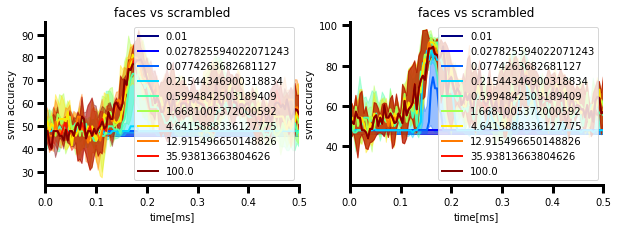

In [48]:
time = np.arange(-0.8,0.501,0.004)
colors = plt.cm.jet(np.linspace(0,1,n_params))

fig, axes = plt.subplots(1, 2, figsize=[10, 3])
for it, parameter in enumerate(tuned_parameters):
    plotShaded(time, accuracies_STOK[it], 0, colors[it], f'{parameter}', axes[0])
    plotShaded(time, accuracies_ROI[it], 0, colors[it], f'{parameter}', axes[1])
    
axes[0].set_xlabel('time[ms]')
axes[0].set_ylabel('svm accuracy')
axes[0].set_title('faces vs scrambled')
axes[0].set_xlim(0, 0.5)
axes[0].legend()
fancyFig(axes[0])

axes[1].set_xlabel('time[ms]')
axes[1].set_ylabel('svm accuracy')
axes[1].set_title('faces vs scrambled')
axes[1].set_xlim(0, 0.5)
axes[1].legend()
fancyFig(axes[1])

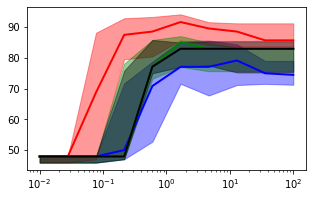

In [9]:
fig, axes = plt.subplots(1, 1, figsize=[5, 3])
plotShaded(tuned_parameters, accuracies_STOK[:,:,242], 1, 'b', 'STOK', axes)
plotShaded(tuned_parameters, accuracies_ROI[:,:,242], 1, 'r', 'ROI', axes)
plotShaded(tuned_parameters, accuracies_STOK_off[:,:,242], 1, 'g', 'STOK_off', axes)
plotShaded(tuned_parameters, accuracies_STOK_all[:,:,242], 1, 'black', 'STOK_all', axes)
axes.set_xscale('log')

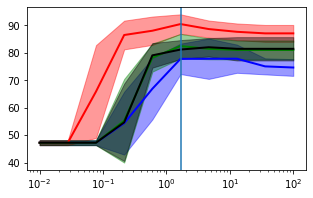

In [15]:
fig, axes = plt.subplots(1, 1, figsize=[5, 3])
plotShadedNorm(tuned_parameters, accuracies_STOK[:,:,242], 1, 'b', 'STOK', axes)
plotShadedNorm(tuned_parameters, accuracies_ROI[:,:,242], 1, 'r', 'ROI', axes)
plotShadedNorm(tuned_parameters, accuracies_STOK_off[:,:,242], 1, 'g', 'STOK_off', axes)
plotShadedNorm(tuned_parameters, accuracies_STOK_all[:,:,242], 1, 'black', 'STOK_all', axes)
axes.set_xscale('log')
axes.axvline(1.66810054)

In [13]:
tuned_parameters

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [41]:
time[242]

0.16800000000000082